# Analyse des Résultats de la Régression Logistique

Ce notebook présente les résultats de la régression logistique appliquée aux données de classification des emails (SPAM ou non). Plusieurs visualisations sont utilisées pour interpréter les performances du modèle.

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [2]:
# Chargement des données et du modèle
print("Chargement des données et du modèle...")
df = pd.read_csv("emails.csv")
X, y = df["Message"], df["Category"]
vectorizer = joblib.load("vectorizer.pkl")
model = joblib.load("model.pkl")
X_vec = vectorizer.transform(X)
print("Données et modèle chargés avec succès !")

Chargement des données et du modèle...


d:\Ecole HETIC\MD5\data visualisation et prototypage agile\Data_Viz_Mails_-SPAM_or_not-\TP\env\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 1.6.0 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Ecole HETIC\MD5\data visualisation et prototypage agile\Data_Viz_Mails_-SPAM_or_not-\TP\env\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.6.0 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Ecole HETIC\MD5\data visualisation et prototypage agile\Data

Données et modèle chargés avec succès !


In [3]:
# Calcul des prédictions et des probabilités
print("Calcul des prédictions...")
y_pred = model.predict(X_vec)
y_proba = model.predict_proba(X_vec)[:, 1]
print("Prédictions calculées avec succès !")

Calcul des prédictions...
Prédictions calculées avec succès !


Affichage de la matrice de confusion...


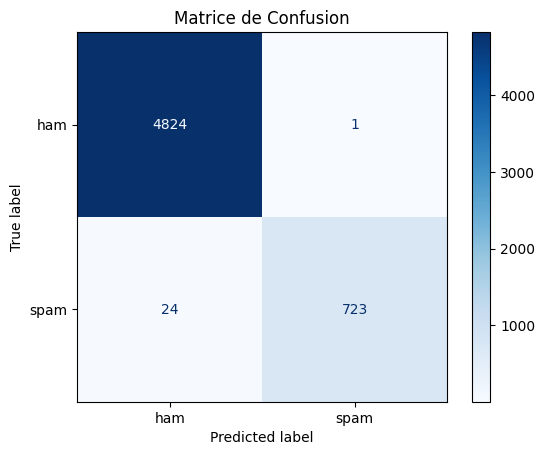

In [4]:
# Matrice de confusion
print("Affichage de la matrice de confusion...")
cm = confusion_matrix(y, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.show()

Affichage de la courbe ROC...


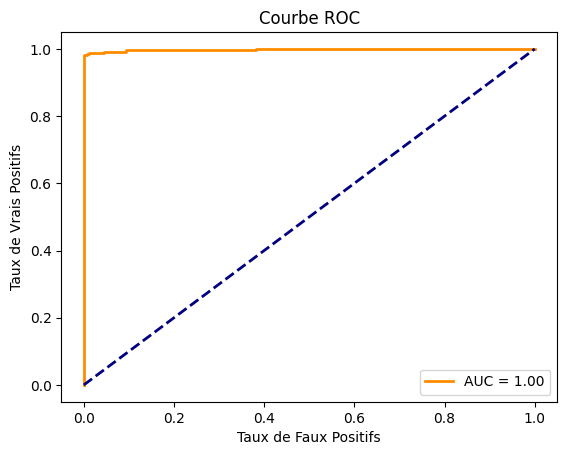

In [5]:
# Courbe ROC
print("Affichage de la courbe ROC...")
fpr, tpr, _ = roc_curve(y, y_proba, pos_label="spam")
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

Affichage de la distribution des probabilités prédites...


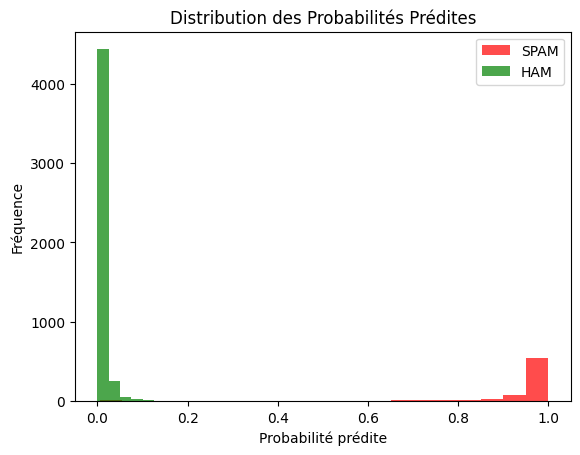

In [6]:
# Distribution des probabilités prédites
print("Affichage de la distribution des probabilités prédites...")
plt.hist(y_proba[y == "spam"], bins=20, alpha=0.7, label="SPAM", color="red")
plt.hist(y_proba[y == "ham"], bins=20, alpha=0.7, label="HAM", color="green")
plt.xlabel("Probabilité prédite")
plt.ylabel("Fréquence")
plt.title("Distribution des Probabilités Prédites")
plt.legend()
plt.show()